In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [3]:
#!pip install tensorflow==2.10

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import  Dense,Activation,Dropout

from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.wrappers.scikit_learn import KerasClassifier


In [5]:
#!pip install np_utils

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
col_name=['Zero','one','two','three','four','five','six','seven','eight','nine']

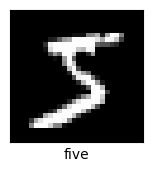

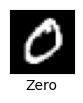

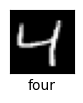

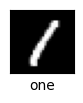

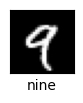

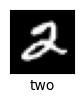

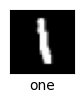

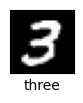

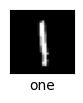

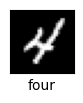

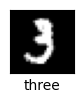

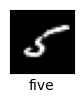

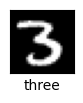

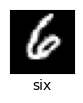

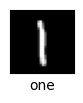

In [8]:
plt.figure(figsize=(10,10))
for i in range (15):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_train[i],cmap='grey')
        plt.xlabel(col_name[y_train[i]])
        plt.show()

In [9]:
x_train.shape
#x_test.shape

(60000, 28, 28)

In [10]:
x_train=x_train.reshape(60000,784)

In [11]:
x_test=x_test.reshape(10000,784)

In [12]:
x_test.shape

(10000, 784)

In [13]:
y_test.shape

(10000,)

In [14]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [15]:
y_test.shape

(10000, 10)

In [16]:

#ANN
#i/p=2D
#o/p=one hot encoding

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [40]:
#create base neural n/w
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

In [41]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                      

In [42]:
#param=o/p channel number*9i/p+1)

In [43]:

#complie the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [44]:
history=model.fit(x_train,y_train,batch_size=100,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
600/600 [==============================] - 7s 8ms/step - loss: 0.5582 - acc: 0.8327 - val_loss: 0.1566 - val_acc: 0.9524
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.2472 - acc: 0.9298 - val_loss: 0.1257 - val_acc: 0.9642
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1964 - acc: 0.9445 - val_loss: 0.1047 - val_acc: 0.9670
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1672 - acc: 0.9517 - val_loss: 0.1000 - val_acc: 0.9711
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1508 - acc: 0.9577 - val_loss: 0.0919 - val_acc: 0.9737
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1387 - acc: 0.9614 - val_loss: 0.0857 - val_acc: 0.9737
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.1261 - acc: 0.9637 - val_loss: 0.0833 - val_acc: 0.9754
Epoch 8/20
600/600 [==============================] - 4s 7ms/step - loss: 0.

In [24]:
y_predict=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [25]:
y_predict=np.argmax(y_predict,axis=1)#predict value
y_test_eval=np.argmax(y_test,axis=1)#actual value

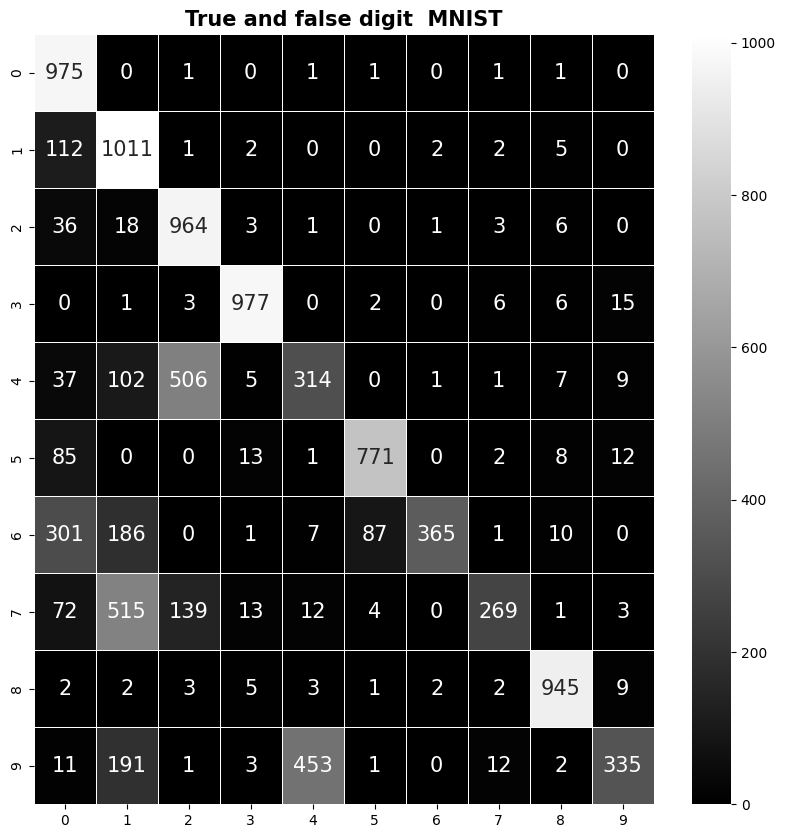

In [45]:
con_mat=confusion_matrix(y_test_eval,y_predict)#find th confusion matrix actual and predict value
#plt.style.use('seaborn_deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':15},linewidths=0.5,fmt='d',cmap='gray')
plt.title("True and false digit  MNIST",fontsize=15,fontweight='bold')
plt.show()

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test_eval,y_predict))
#overall accuracy analysis --too low so we alter the previous method
#f1 -score is easy to find how much learning particular data learn
#so we again imporve the learning method

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       980
           1       0.50      0.89      0.64      1135
           2       0.60      0.93      0.73      1032
           3       0.96      0.97      0.96      1010
           4       0.40      0.32      0.35       982
           5       0.89      0.86      0.88       892
           6       0.98      0.38      0.55       958
           7       0.90      0.26      0.41      1028
           8       0.95      0.97      0.96       974
           9       0.87      0.33      0.48      1009

    accuracy                           0.69     10000
   macro avg       0.76      0.69      0.67     10000
weighted avg       0.76      0.69      0.67     10000



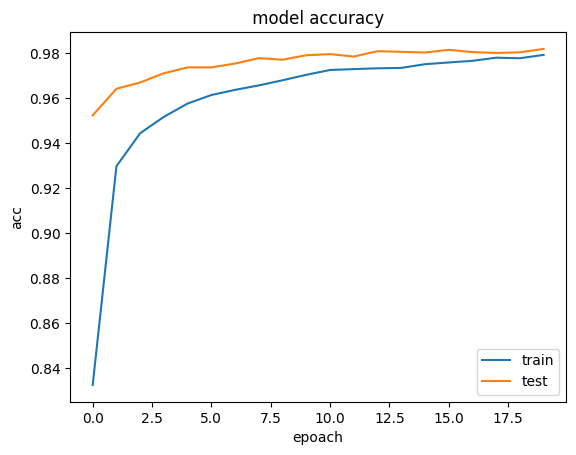

In [47]:
h=history
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(["train","test"],loc='best')
plt.xlabel("epoach")
plt.ylabel("acc")
plt.title(" model accuracy ")
plt.show()
         

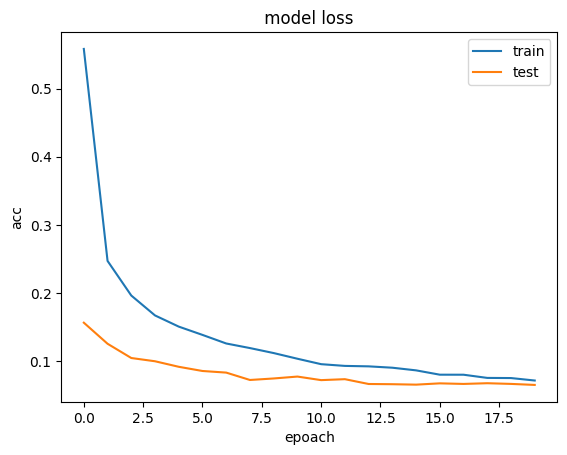

In [48]:
h=history
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(["train","test"],loc='best')
plt.xlabel("epoach")
plt.ylabel("acc")
plt.title(" model loss ")
plt.show()

In [64]:
#end user side check
y_predict_single=model.predict(x_test[[9]])
y_predict_single=np.argmax(y_predict_single,axis=1)
y_test_eval=np.argmax(y_test,axis=1)


1/1 [==============================] - 0s 47ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

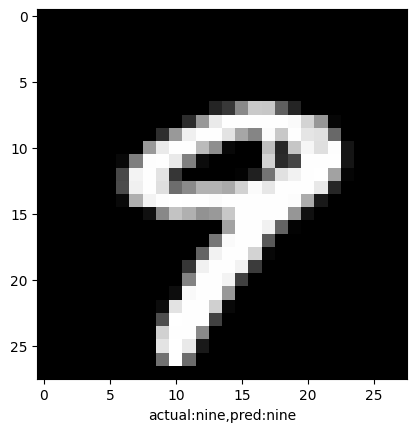

In [66]:
col_names=['Zero','one','two','three','four','five','six','seven','eight','nine']
plt.imshow(x_test[9].reshape(28,28),cmap="gray")
plt.xlabel("actual:{},pred:{}".format(col_names[np.argmax(y_test[9])],col_names[y_predict_single[0]]))
plt.show